In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import cv2 as cv
import os

from mytest.k_domino import tile_types_str

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import plot_tree

In [210]:
df = pd.read_csv('median_hsv_full.csv')
# df = df.drop('Tile', axis=1)

df

,n_img,n_row,n_col,tile_type,h,s,v
0,0,4,4,0,26.0,246.0,198.0
1,0,0,0,1,43.0,215.0,156.0
2,0,1,0,1,44.0,212.0,156.0
3,0,1,4,1,42.0,216.0,151.0
4,0,2,0,1,41.0,209.0,154.0
...,...,...,...,...,...,...,...
1845,73,4,1,4,105.0,248.0,152.0
1846,73,4,2,4,105.0,250.0,160.0
1847,73,4,3,4,105.0,248.0,154.0
1848,73,4,4,4,106.0,232.0,138.0


In [211]:
# train_images = [0, 1, 2, 11, 12, 13, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 54, 55, 56, 64, 65, 66]

# df = df[~df['n_img'].isin(train_images)]

In [212]:

df = df.drop(['n_img', 'n_row', 'n_col'], axis=1)
df = df.rename(columns={'h': 'hue', 's': 'saturation', 'v': 'value'})

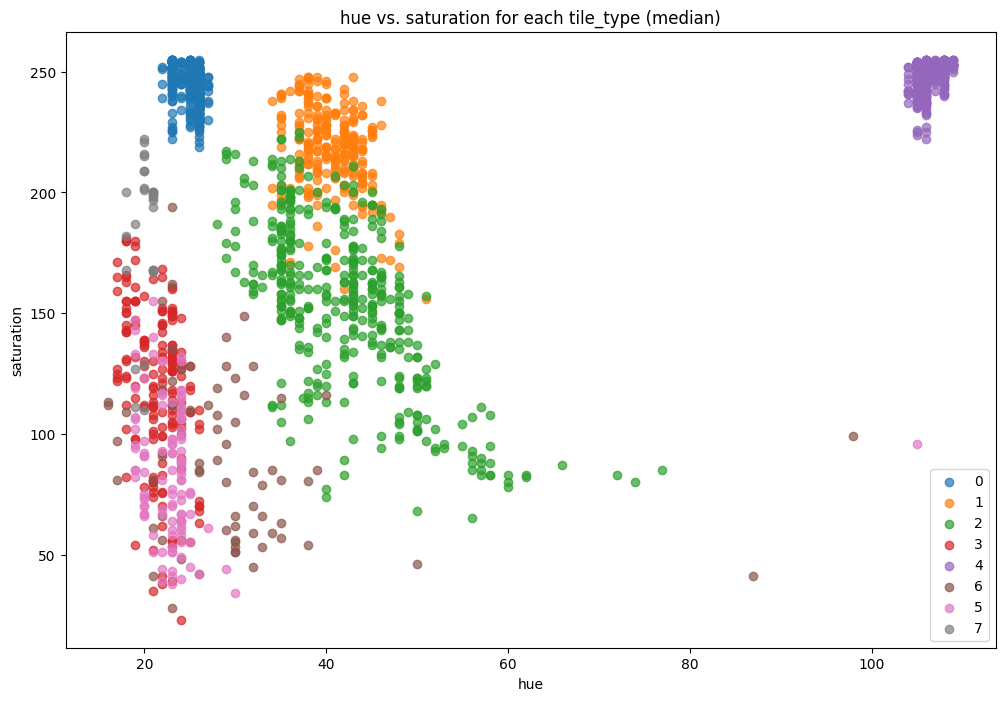

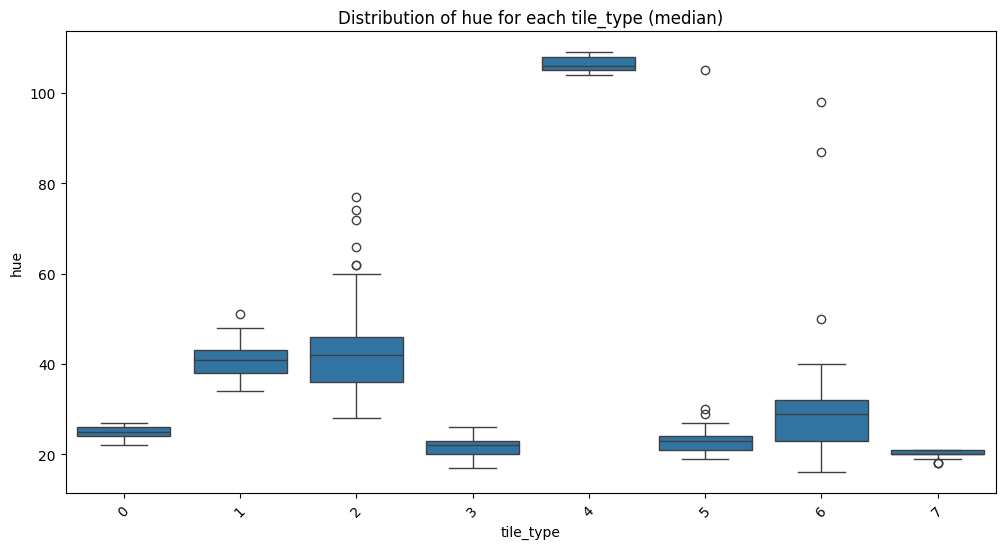

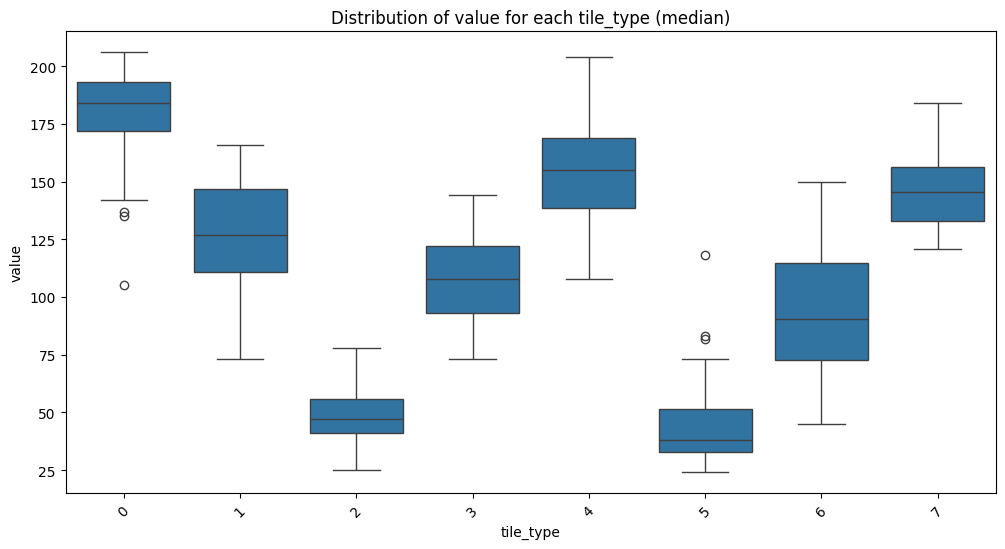

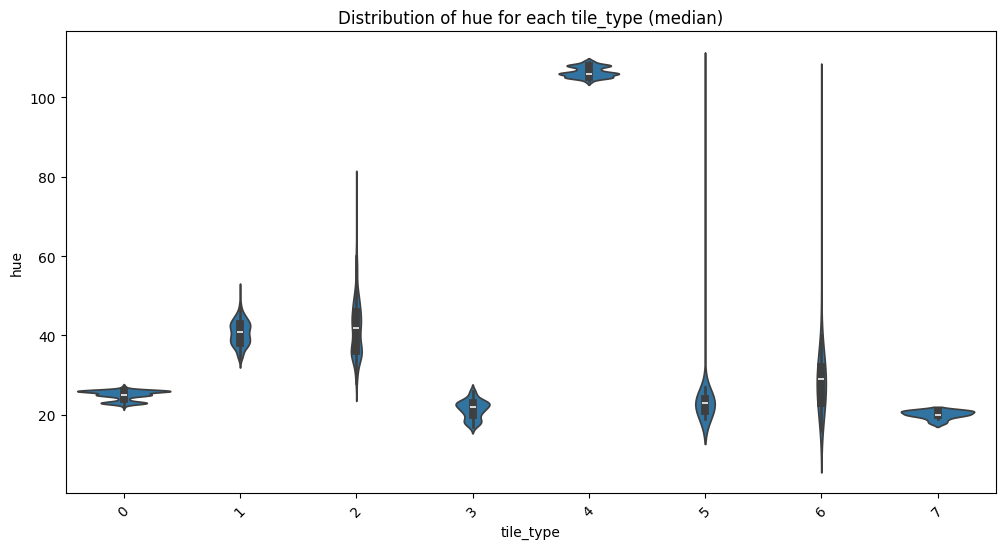

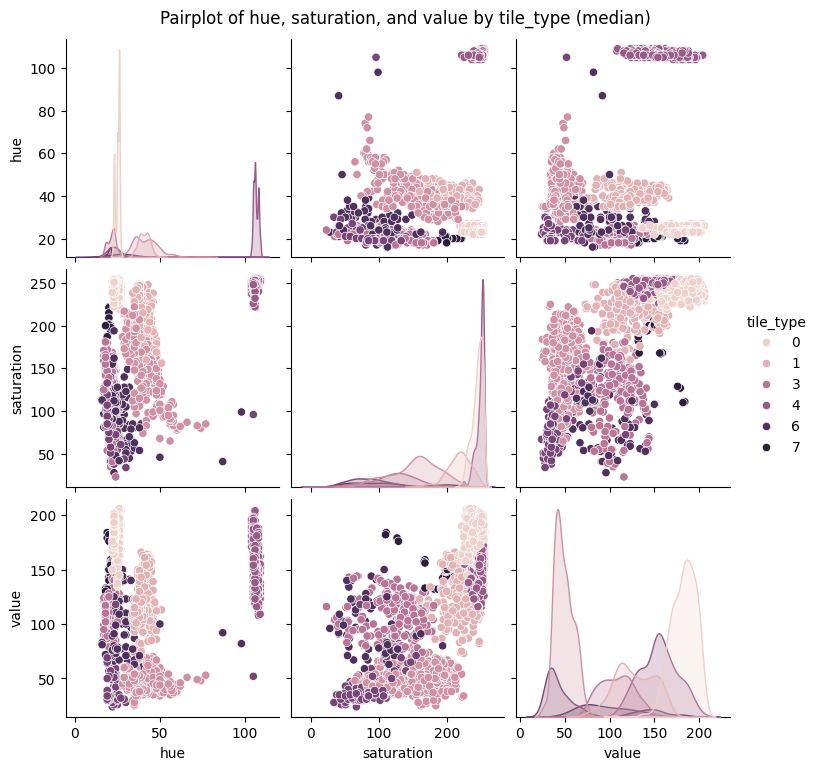

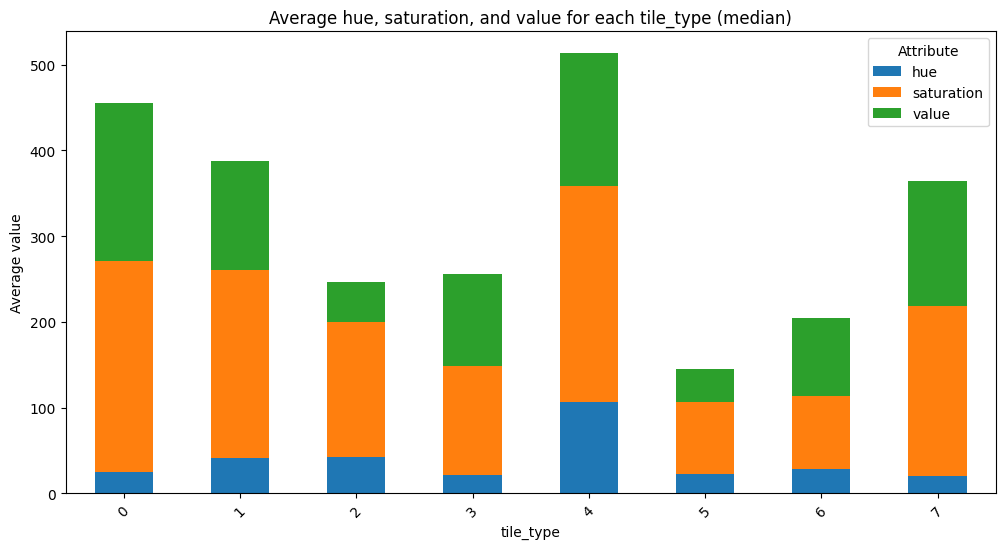

In [213]:
# 1. Scatter plot of hue vs. saturation for each tile_type
plt.figure(figsize=(12, 8))
for type in df['tile_type'].unique():
    subset = df[df['tile_type'] == type]
    plt.scatter(subset['hue'], subset['saturation'], label=type, alpha=0.7)
plt.xlabel('hue')
plt.ylabel('saturation')
plt.title('hue vs. saturation for each tile_type (median)')
plt.legend()
plt.show()

# 2. Box plot of value for each tile_type
plt.figure(figsize=(12, 6))
sns.boxplot(x='tile_type', y='hue', data=df)
plt.title('Distribution of hue for each tile_type (median)')
plt.xticks(rotation=45)
plt.show()

# 2. Box plot of value for each tile_type
plt.figure(figsize=(12, 6))
sns.boxplot(x='tile_type', y='value', data=df)
plt.title('Distribution of value for each tile_type (median)')
plt.xticks(rotation=45)
plt.show()

# 3. Violin plot of hue for each tile_type
plt.figure(figsize=(12, 6))
sns.violinplot(x='tile_type', y='hue', data=df)
plt.title('Distribution of hue for each tile_type (median)')
plt.xticks(rotation=45)
plt.show()

# 4. Pairplot for all numerical variables, colored by tile_type
sns.pairplot(df, hue='tile_type', vars=['hue', 'saturation', 'value'])
plt.suptitle('Pairplot of hue, saturation, and value by tile_type (median)', y=1.02)
plt.show()

# 5. Stacked bar chart of average hue, saturation, and value for each tile_type
avg_data = df.groupby('tile_type')[['hue', 'saturation', 'value']].median()
avg_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Average hue, saturation, and value for each tile_type (median)')
plt.xlabel('tile_type')
plt.ylabel('Average value')
plt.legend(title='Attribute')
plt.xticks(rotation=45)
plt.show()

In [214]:
X = df.drop('tile_type', axis=1)
y = df['tile_type'].astype('category')

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [216]:
k = 22
knn = KNeighborsClassifier(k)

In [217]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=22)

In [218]:
y_pred = knn.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)
print(report)
pd.DataFrame(report).transpose()

{'0': {'precision': 1.0, 'recall': 0.9921875, 'f1-score': 0.996078431372549, 'support': 128.0}, '1': {'precision': 0.9152542372881356, 'recall': 0.9818181818181818, 'f1-score': 0.9473684210526315, 'support': 55.0}, '2': {'precision': 0.9516129032258065, 'recall': 1.0, 'f1-score': 0.9752066115702479, 'support': 118.0}, '3': {'precision': 0.7674418604651163, 'recall': 0.8918918918918919, 'f1-score': 0.825, 'support': 37.0}, '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 80.0}, '5': {'precision': 1.0, 'recall': 0.8, 'f1-score': 0.8888888888888888, 'support': 20.0}, '6': {'precision': 0.6666666666666666, 'recall': 0.42105263157894735, 'f1-score': 0.5161290322580645, 'support': 19.0}, '7': {'precision': 1.0, 'recall': 0.3333333333333333, 'f1-score': 0.5, 'support': 6.0}, 'accuracy': 0.9460043196544277, 'macro avg': {'precision': 0.9126219584557156, 'recall': 0.8025354423277943, 'f1-score': 0.8310839231427978, 'support': 463.0}, 'weighted avg': {'precision': 0.94533762664

,precision,recall,f1-score,support
0,1.000000,0.992188,0.996078,128.000000
1,0.915254,0.981818,0.947368,55.000000
2,0.951613,1.000000,0.975207,118.000000
3,0.767442,0.891892,0.825000,37.000000
4,1.000000,1.000000,1.000000,80.000000
5,1.000000,0.800000,0.888889,20.000000
6,0.666667,0.421053,0.516129,19.000000
7,1.000000,0.333333,0.500000,6.000000
accuracy,0.946004,0.946004,0.946004,0.946004
macro avg,0.912622,0.802535,0.831084,463.000000


In [219]:
gbc = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 4, 6],
    'subsample': [0.8, 0.9, 1.0]
}
grid_search = GridSearchCV(
    estimator=gbc,
    param_grid=param_grid,
    cv=5,  # Number of cross-validation folds
    scoring='accuracy',  # Metric to optimize
    n_jobs=-1  # Use all available cores
)


In [220]:
# grid_search.fit(X_train, y_train)
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [221]:
# gbc = grid_search.best_estimator_

y_pred = gbc.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report).transpose()
"""
WHEAT_FIELD = 0
GRASSLAND = 1
FOREST = 2
SWAMP = 3
LAKE = 4
MINE = 5
CASTLE = 6
TABLE = 7
"""

'\nWHEAT_FIELD = 0\nGRASSLAND = 1\nFOREST = 2\nSWAMP = 3\nLAKE = 4\nMINE = 5\nCASTLE = 6\nTABLE = 7\n'

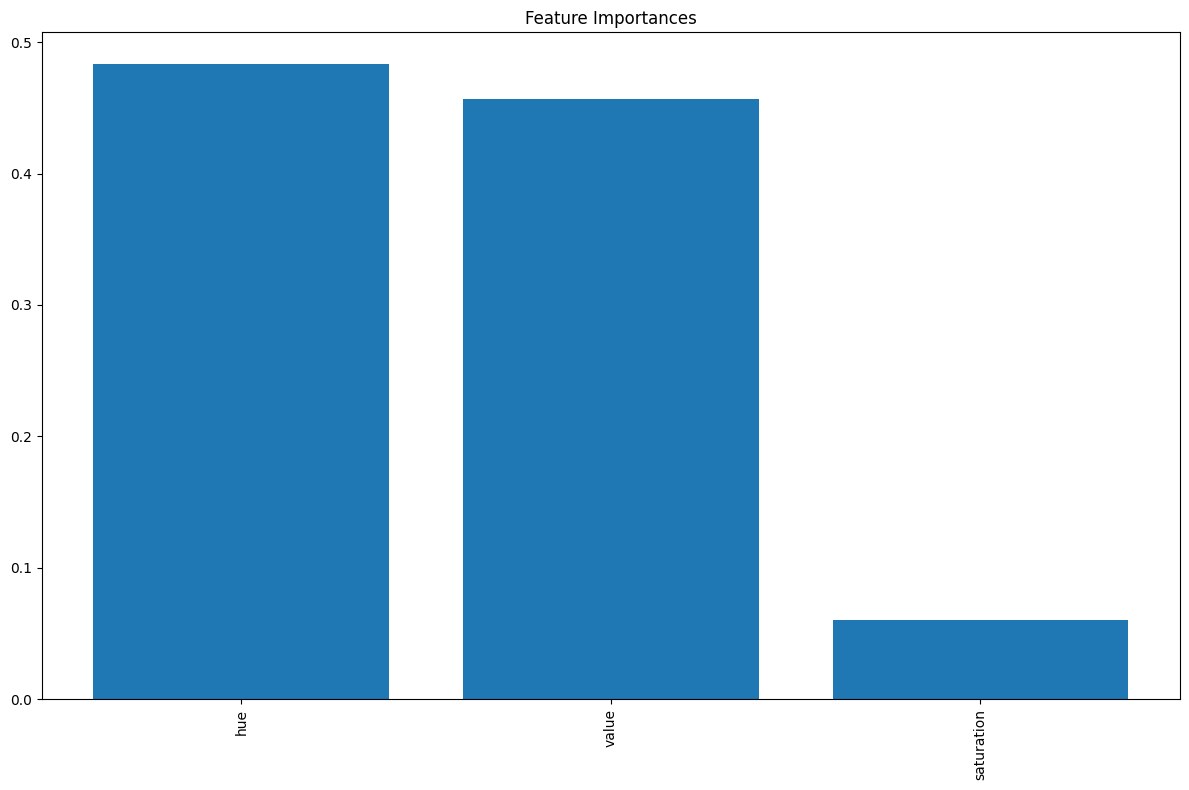

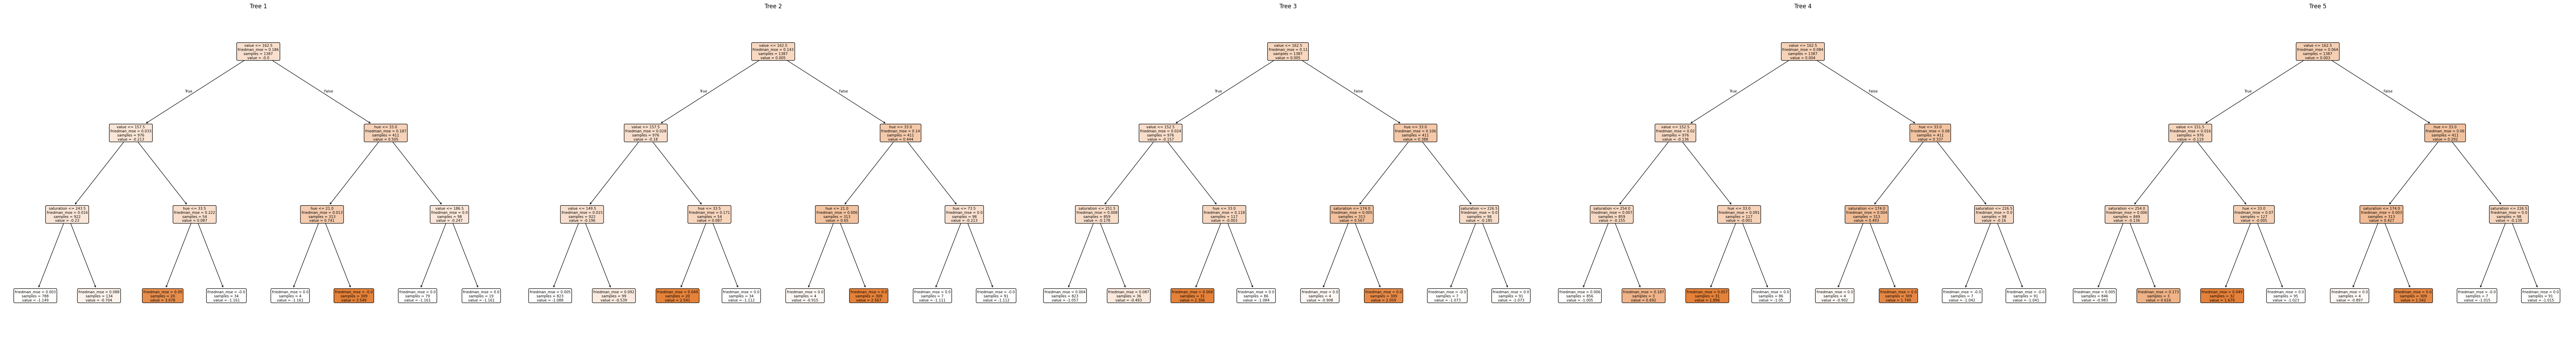

In [222]:
def plot_feature_importances(gbc, feature_names):
    importances = gbc.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(12, 8))
    plt.title("Feature Importances")
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

# Plot the forest (first few trees)
def plot_gbc_forest(gbc, max_trees=5):
    n_trees = min(max_trees, len(gbc.estimators_))
    fig, axes = plt.subplots(nrows=1, ncols=n_trees, figsize=(n_trees*15, 10))
    
    if n_trees == 1:
        axes = [axes]
    
    for i, ax in enumerate(axes):
        plot_tree(gbc.estimators_[i][0], ax=ax, filled=True, rounded=True, feature_names=feature_names)
        ax.set_title(f"Tree {i+1}")
    
    plt.tight_layout()
    plt.show()

# Assuming you have your feature names in a list called 'feature_names'
# If not, you can create a list of generic feature names
# feature_names = [f"feature_{i}" for i in range(gbc.n_features_)]

feature_names = ['hue', 'saturation', 'value']

# Plot feature importances
plot_feature_importances(gbc, feature_names)

# Plot the forest (first 5 trees)
plot_gbc_forest(gbc, max_trees=5)

In [223]:
def get_tiles(image):
    tiles = []
    for y in range(5):
        tiles.append([])
        for x in range(5):
            tiles[-1].append(image[y * 100 : (y + 1) * 100, x * 100 : (x + 1) * 100])
    return tiles

In [236]:
described = {}
unique_tile_tyles = df['tile_type'].unique()
for tile_type in unique_tile_tyles:
    described[tile_type] = df[df['tile_type'] == tile_type].describe(percentiles=[0.005, 0.5, 0.995]).to_dict()

def get_terrain(hue, saturation, value):
    # df_tile = pd.DataFrame({ 'hue': hue, 'saturation': saturation, 'value': value })

    # return gbc.predict(df_tile)

    for tile_type in unique_tile_tyles:
        described_tile = described[tile_type]

        if described_tile['hue']['0.5%'] < hue < described_tile['hue']['99.5%'] and described_tile['saturation']['0.5%'] < saturation < described_tile['saturation']['99.5%'] and described_tile['value']['0.5%'] < value < described_tile['value']['99.5%']:
            return tile_type
        
    return -1
        
    # if 23 < hue < 27 and 229 < saturation < 255 and 153 < value < 198:
    #     return 0
    # if 29 < hue < 60 and 74 < saturation < 223 and 33 < value < 64:
    #     return 2
    # if 60 < hue < 109 and 210 < saturation < 255 and 108 < value < 187:
    #     return 4
    # if 34 < hue < 48 and 160 < saturation < 255 and 73 < value < 156:
    #     return 1
    # if 18 < hue < 26 and 35 < saturation < 209 and 73 < value < 147:
    #     return 3
    # if 20 < hue < 27 and 39 < saturation < 132 and 24 < value < 57:
    #     return 5
    # if 17 < hue < 38 and 41 < saturation < 149 and 53 < value < 141:
    #     return 6
    # return 7

In [237]:
def predict(X):
    pred = np.zeros(len(X))


    for i in range(len(X)):
        pred[i] = get_terrain(*X.iloc[i])

    return pred

In [240]:
y_pred = predict(X_test)
y_pred

array([ 2.,  3.,  3.,  6.,  2.,  1.,  2.,  0.,  0.,  6.,  0.,  2.,  3.,
        2.,  0.,  0.,  2.,  0.,  1.,  2.,  0., -1.,  2.,  1.,  0.,  6.,
        1.,  3.,  6.,  2.,  6.,  2.,  0.,  6., -1.,  0.,  2.,  4.,  3.,
        0.,  0.,  2.,  1.,  0.,  2.,  4.,  1.,  4.,  0.,  2.,  1.,  3.,
        2.,  0.,  1.,  1.,  2., -1.,  0.,  2.,  4.,  1.,  3.,  2.,  4.,
        5.,  1.,  0.,  0.,  0.,  4.,  2.,  2.,  2.,  0.,  1.,  4.,  5.,
        2.,  1.,  3., -1.,  2.,  2.,  0., -1.,  2.,  0.,  0.,  2.,  0.,
        5., -1.,  2.,  0.,  1.,  0.,  0.,  1., -1.,  0.,  0., -1.,  2.,
       -1.,  3.,  3.,  2.,  2.,  0.,  3.,  0.,  2.,  2.,  4.,  2.,  3.,
        4.,  3.,  3.,  3.,  0.,  1.,  0., -1.,  0.,  4.,  6.,  0.,  4.,
        1.,  0.,  2.,  0.,  2.,  0.,  1.,  2.,  0.,  4.,  4.,  2.,  2.,
       -1.,  2.,  1.,  0.,  6.,  2.,  1.,  0.,  2.,  0.,  1.,  0.,  4.,
        0.,  2.,  0.,  0.,  0.,  2.,  2.,  2.,  2.,  2.,  2., -1.,  0.,
        0.,  0.,  1., -1.,  2.,  1.,  3.,  0.,  3.,  3.,  0.,  2

In [242]:
report = classification_report(y_test, y_pred, output_dict=True)

pd.DataFrame(report).transpose()

/home/baldo/uni/daki_p0/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/baldo/uni/daki_p0/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/baldo/uni/daki_p0/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
-1.0,0.000000,0.000000,0.000000,0.00000
0.0,1.000000,0.914062,0.955102,128.00000
1.0,1.000000,0.909091,0.952381,55.00000
2.0,0.982301,0.940678,0.961039,118.00000
3.0,0.850000,0.918919,0.883117,37.00000
4.0,1.000000,0.812500,0.896552,80.00000
5.0,1.000000,0.750000,0.857143,20.00000
6.0,0.521739,0.631579,0.571429,19.00000
7.0,1.000000,0.166667,0.285714,6.00000
accuracy,0.874730,0.874730,0.874730,0.87473


In [228]:
len(y_train)

1387

In [245]:
tile_classes = df['tile_type'].unique()
confusion_matrix = np.zeros((len(tile_classes), len(tile_classes)))

for i in range(len(tile_classes)):
    for j in range(len(tile_classes)):
        confusion_matrix[j, i] = np.sum(y_pred[y_test == i] == j)

# pd.DataFrame(confusion_matrix)
sum(y == 6)

72

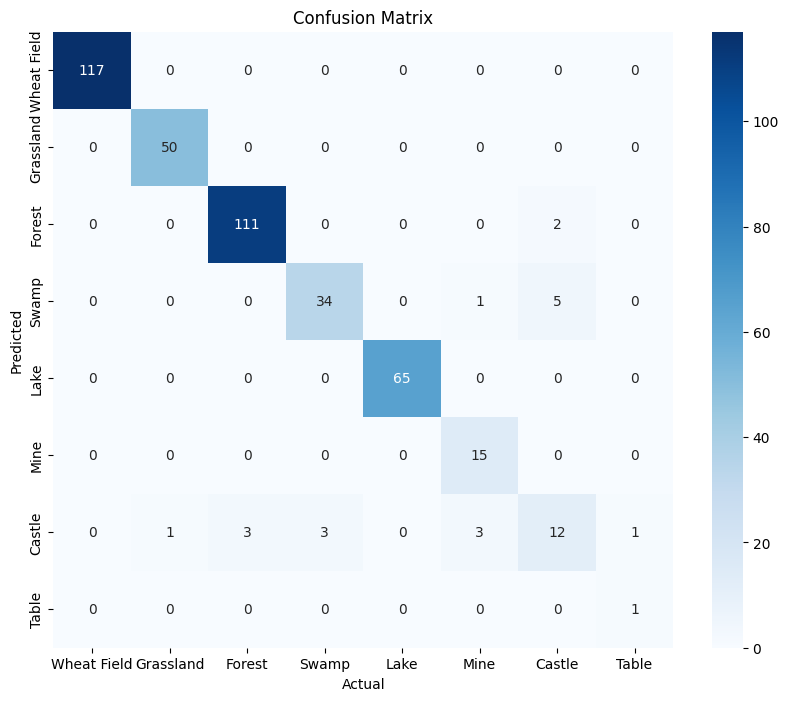

In [246]:
# Create a figure and axis
plt.figure(figsize=(10, 8))

tile_classes_str = [
    "Wheat Field",
    "Grassland",
    "Forest",
    "Swamp",
    "Lake",
    "Mine",
    "Castle",
    "Table",
]

# Create the heatmap using Seaborn
sns.heatmap(confusion_matrix.astype(np.int16), annot=True, fmt='d', cmap='Blues', 
            xticklabels=tile_classes_str,  # Replace with your class labels
            yticklabels=tile_classes_str)  # Replace with your class labels

# Set labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [247]:
print(f'med i cm: {confusion_matrix.sum()}')
print(f'ikke med i cm: {len(y_pred) - confusion_matrix.sum()}')

print(f'andel ikke med i cm: {(len(y_pred) - confusion_matrix.sum()) / len(y_pred):0.01%}')


med i cm: 424.0
ikke med i cm: 39.0
andel ikke med i cm: 8.4%
